In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('IRIS.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df = df.drop_duplicates (subset="species")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [9]:
df.value_counts('species')

species
Iris-setosa        1
Iris-versicolor    1
Iris-virginica     1
Name: count, dtype: int64

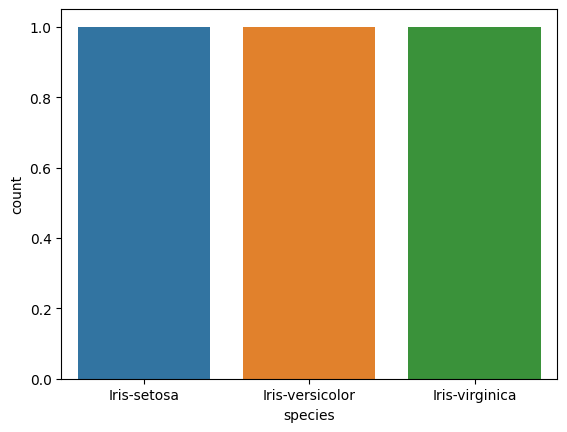

In [10]:
sns.countplot(x='species', data=df)
plt.show()

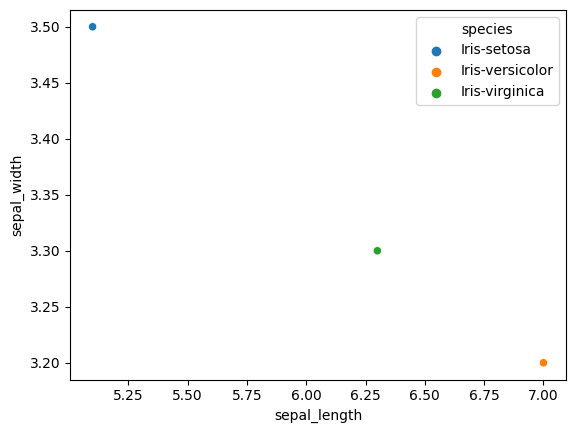

In [11]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

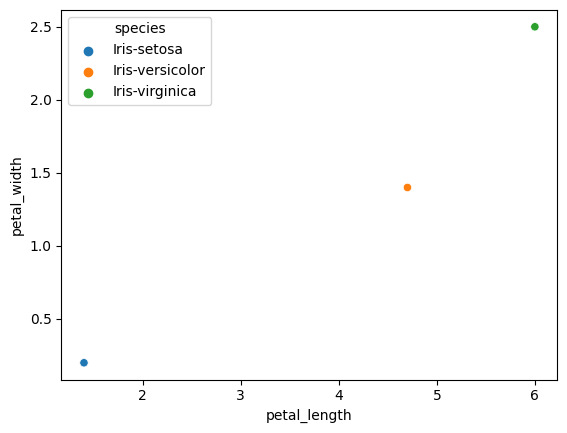

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the necessary columns
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.show()


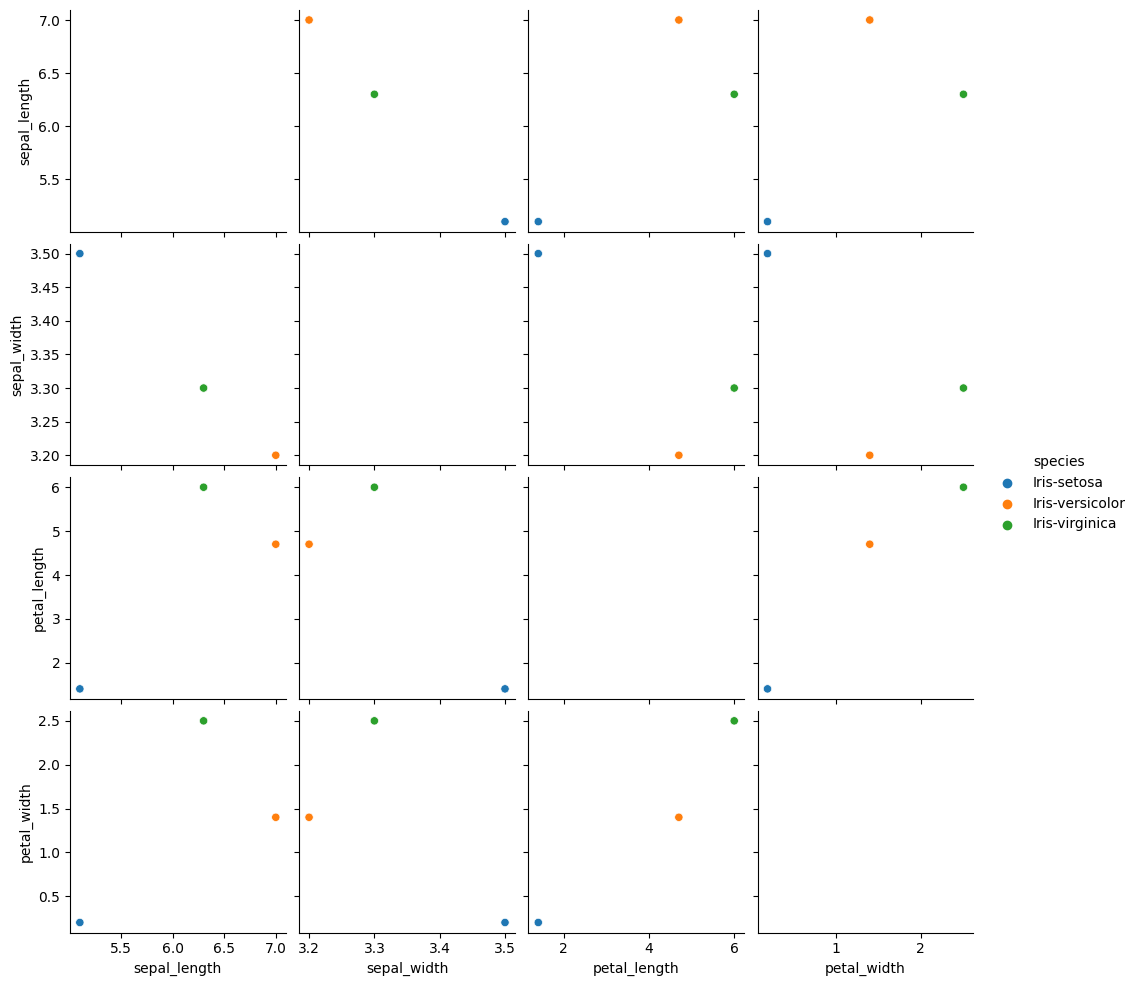

In [13]:
# pairplit graph
sns.pairplot(df, hue='species', height=2.5)

(array([1., 0., 1., 0., 1.]),
 array([0.2 , 0.66, 1.12, 1.58, 2.04, 2.5 ]),
 <BarContainer object of 5 artists>)

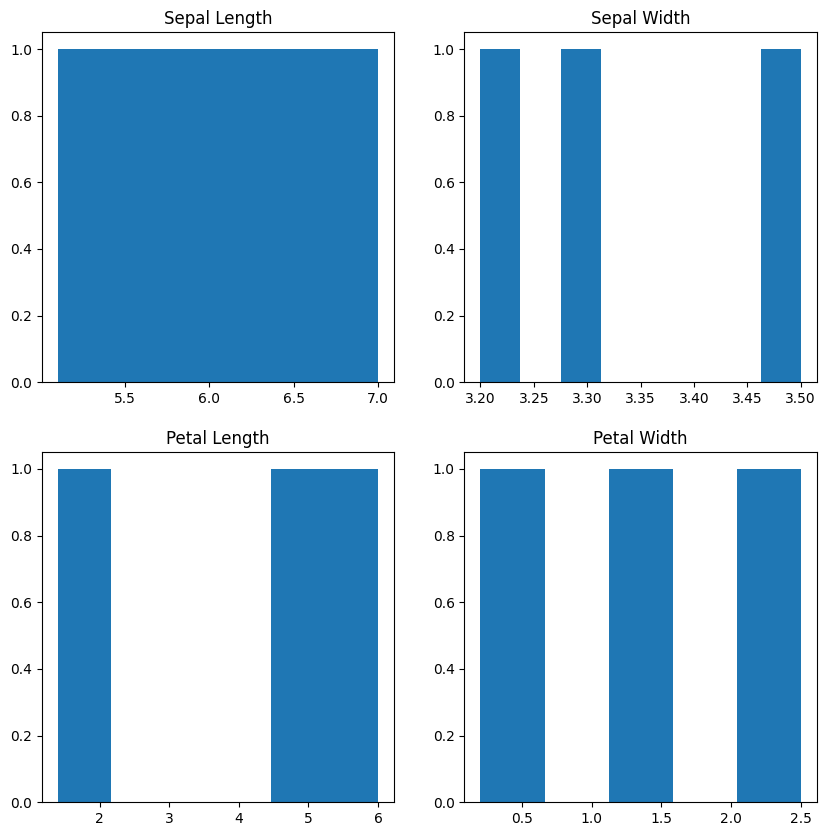

In [14]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
axes[0,0].set_title('Sepal Length')
axes[0,0].hist(df['sepal_length'],bins=3)
axes[0,1].set_title('Sepal Width')
axes[0,1].hist(df['sepal_width'],bins=8)
axes[1,0].set_title('Petal Length')
axes[1,0].hist(df['petal_length'],bins=6)
axes[1,1].set_title('Petal Width')
axes[1,1].hist(df['petal_width'],bins=5)

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for his

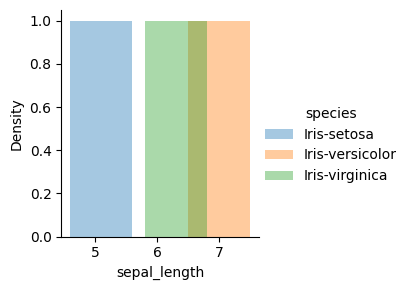

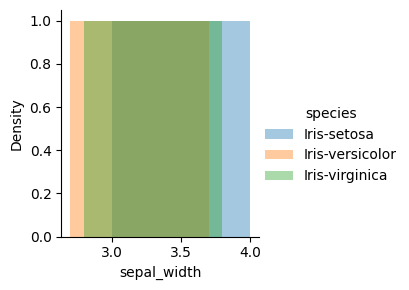

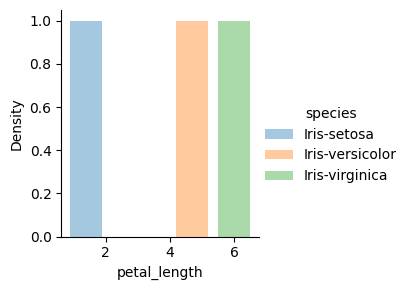

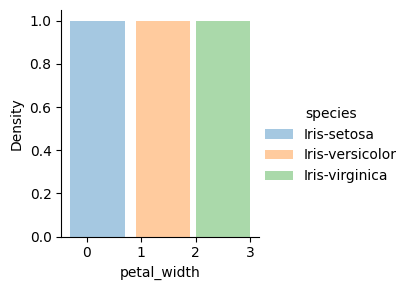

In [15]:
plot = sns.FacetGrid(df,hue='species')
plot.map(sns.distplot,'sepal_length').add_legend()

plot = sns.FacetGrid(df,hue='species')
plot.map(sns.distplot,'sepal_width').add_legend()

plot = sns.FacetGrid(df,hue='species')
plot.map(sns.distplot,'petal_length').add_legend()

plot = sns.FacetGrid(df,hue='species')
plot.map(sns.distplot,'petal_width').add_legend()

plt.show()

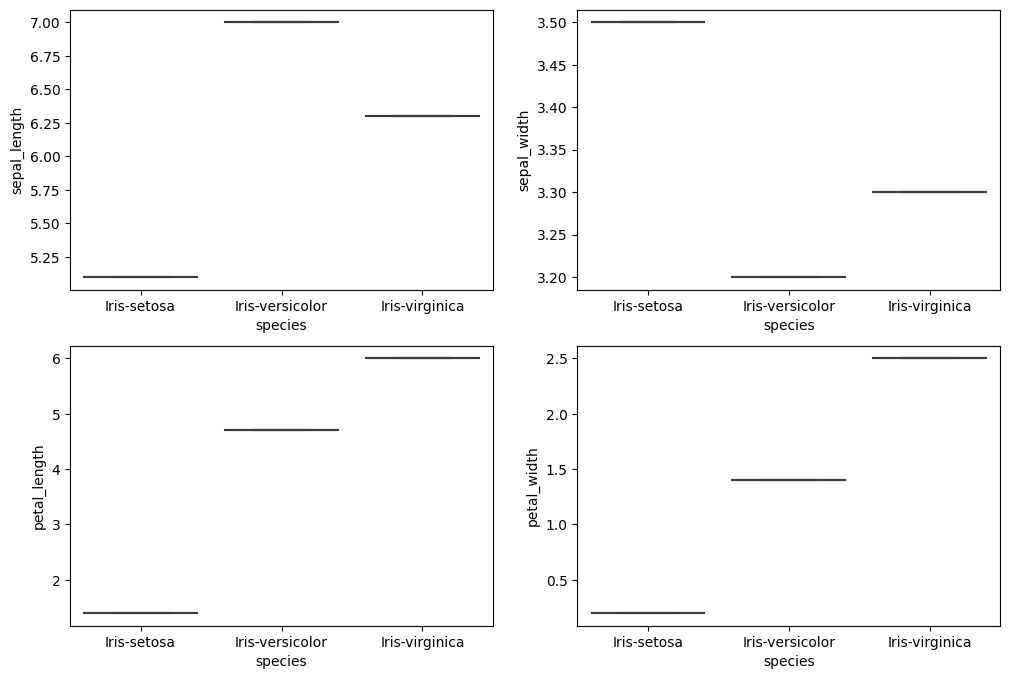

In [27]:
def graph(y):
    sns.boxplot(x="species", y=y, data=df)

plt.figure(figsize=(12, 8))



plt.subplot(221)
graph('sepal_length')

plt.subplot(222)
graph('sepal_width')

plt.subplot(223)
graph('petal_length')

plt.subplot(224)
graph('petal_width')

plt.show()

<Axes: xlabel='sepal_width', ylabel='species'>

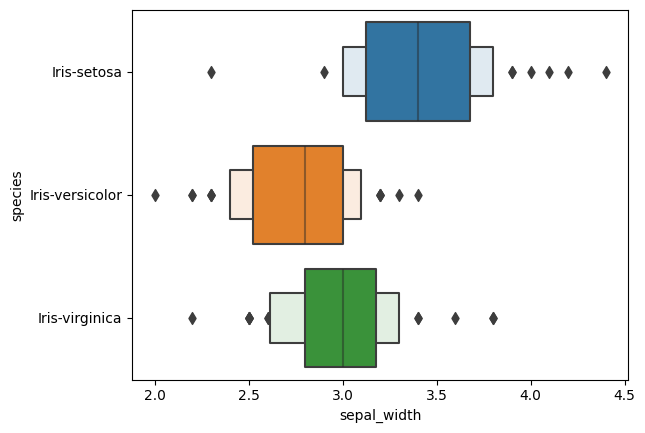

In [29]:
df = pd.read_csv('IRIS.csv')
sns.boxenplot(x='sepal_width', y='species', data=df)

OLD SHAPES:  (150, 5)
NEW SHAPES:  (150, 5)


<Axes: xlabel='sepal_length'>

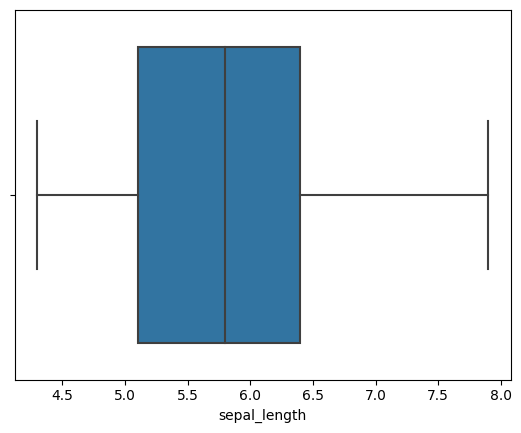

In [31]:
df = pd.read_csv('IRIS.csv')
Q1 = np.percentile(df['sepal_length'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['sepal_length'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print("OLD SHAPES: ", df.shape)


upper = np.where(df['sepal_length'] >= (Q3+1.5*IQR))
lower = np.where(df['sepal_length'] <= (Q1-1.5*IQR))


df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("NEW SHAPES: ", df.shape)


sns.boxplot(x = df['sepal_length'])